In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the reduced dataset
df = pd.read_csv("reduced_features_dataset.csv")

# Split features and target
X = df.drop(columns=['Age'])  # Features
y = df['Age']                 # Target variable

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest Model
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    random_state=42
)
rf_model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ Mean Absolute Error (MAE): {mae:.2f}")
print(f"✅ R² Score: {r2:.2f}")


✅ Mean Absolute Error (MAE): 7.69
✅ R² Score: 0.43


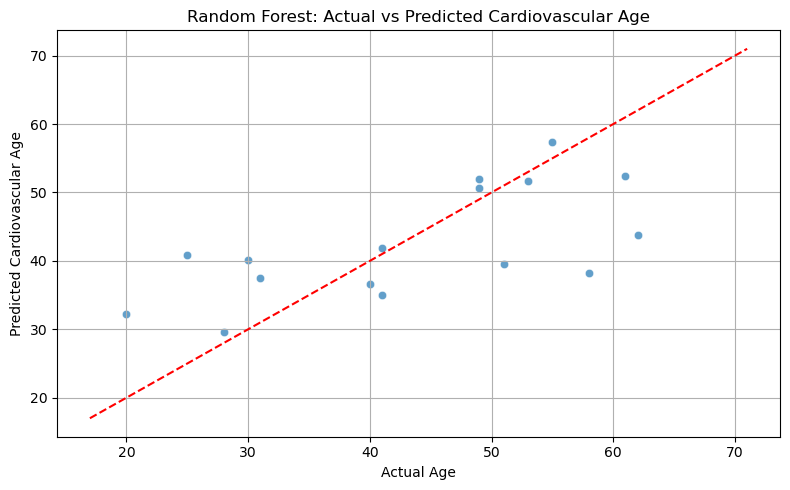

In [7]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Age")
plt.ylabel("Predicted Cardiovascular Age")
plt.title("Random Forest: Actual vs Predicted Cardiovascular Age")
plt.grid(True)
plt.tight_layout()
plt.show()


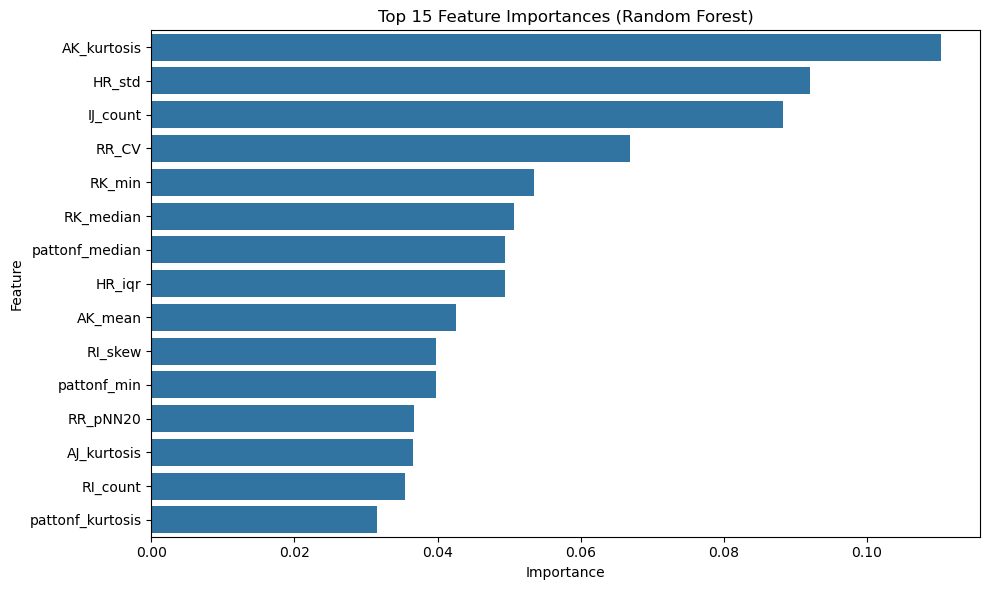

In [9]:
importances = rf_model.feature_importances_
feat_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(15))
plt.title("Top 15 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

